<a href="https://colab.research.google.com/github/AditiSatsangi/Miscellaneous-Projects/blob/main/Cat_dog_classifiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt



In [3]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

# Data Loading

In [4]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir= tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=_URL, extract= True)

68606236/68606236 [==============================] - 0s 0us/step


In [5]:
zip_dir_base= os.path.dirname(zip_dir)  # List directories with command
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs


Assign variables with proper file path

In [6]:
base_dir= os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir= os.path.join(base_dir, 'validation')

train_cats_dir= os.path.join(train_dir, 'cats')# Cat pics training
train_dogs_dir= os.path.join(train_dir, 'dogs')# Dog pics training
validation_cats_dir= os.path.join(validation_dir, 'cats')# Cat pics validation
validation_dogs_dir= os.path.join(validation_dir, 'dogs')# dogs pics validation

# Understanding data

In [7]:
num_cats_tr= len(os.listdir(train_cats_dir))
num_dogs_tr= len(os.listdir(train_dogs_dir))
num_cats_val= len(os.listdir(validation_cats_dir))
num_dogs_val= len(os.listdir(validation_dogs_dir))

total_train= num_cats_tr+ num_dogs_tr
total_val = num_cats_val+ num_dogs_val

In [8]:
print('Total training cats img:', num_cats_tr)
print('Total training dogs img:', num_dogs_tr)
print('Total validation cats img:', num_cats_val)
print('Total validation dogs img:', num_dogs_val)
print('Total training img:',total_train)
print('Total validation img:', total_val)

Total training cats img: 1000
Total training dogs img: 1000
Total validation cats img: 500
Total validation dogs img: 500
Total training img: 2000
Total validation img: 1000


# Setting Model Parameters

In [9]:
BATCH_SIZE= 100 #No. of training  ex. to process before updtating model variables
IMG_SHAPE= 150 #Trainig  data with width and height bpoth as 150 pixels


# Data Preparation

In [10]:
train_image_generator= ImageDataGenerator(rescale= 1./255) #Generate for training data
validation_image_generator = ImageDataGenerator(rescale= 1./255) #Generate for validation data

flow_from_directory method will load images from the disk, apply rescaling, and resize them using single line of code.

In [11]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [15]:
val_data_gen= validation_image_generator.flow_from_directory(batch_size = BATCH_SIZE,
                                                             directory= validation_dir,
                                                             shuffle=False,
                                                             target_size=(IMG_SHAPE,IMG_SHAPE),
                                                             class_mode='binary')

Found 1000 images belonging to 2 classes.


# Visualizing Training Images

In [16]:
sample_training_images, _= next(train_data_gen)
#The next function returns a batch from the dataset.

In [17]:
def plotImages(images_arr):
  fig, axes= plt.subplots(1,5,figsize=(20,20))
  axes= axes.flatten()
  for img,ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

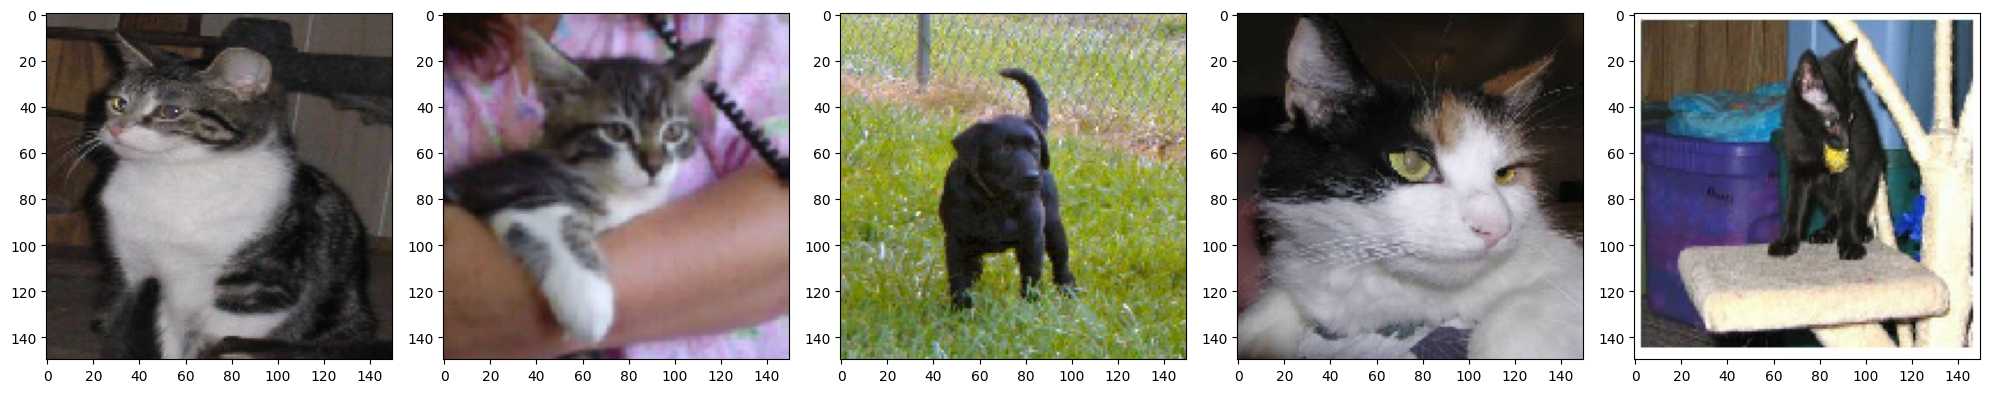

In [18]:
plotImages(sample_training_images[: 5]) #Plot img 0-4

# Model Creation

Define Model

In [ ]:
#model consists of four convolution blocks with a max pool layer in each of them.
#we have a fully connected layer with 512 units, with relu activation function
# The model will output class probabilities for two classes — dogs and cats — using softmax.

In [25]:
model= tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation= 'relu'),
    tf.keras.layers.Dense(2)

])

Compile model

In [26]:
#Use the adam optimizer generally.
# Since we output a softmax categorization, we'll use sparse_categorical_crossentropy as the loss function.

In [27]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
              metrics= ['accuracy'])

Model Summary

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 128)      0

Train Model

In [30]:
EPOCHS = 100
history= model.fit_generator(
    train_data_gen,
    steps_per_epoch= int(np.ceil(total_train/ float(BATCH_SIZE))),
    epochs= EPOCHS,
    validation_data= val_data_gen,
    validation_steps = int(np.ceil(total_val/ float(BATCH_SIZE)))
)

<ipython-input-30-e2c2a110abb1>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history= model.fit_generator(


Epoch 1/100
20/20 [==============================] - 211s 11s/step - loss: 0.7152 - accuracy: 0.5100 - val_loss: 0.6904 - val_accuracy: 0.5780
Epoch 2/100
20/20 [==============================] - 136s 7s/step - loss: 0.6922 - accuracy: 0.5465 - val_loss: 0.7107 - val_accuracy: 0.5050
Epoch 3/100
20/20 [==============================] - 134s 7s/step - loss: 0.6695 - accuracy: 0.5945 - val_loss: 0.6500 - val_accuracy: 0.6080
Epoch 4/100
20/20 [==============================] - 144s 7s/step - loss: 0.6834 - accuracy: 0.5910 - val_loss: 0.6499 - val_accuracy: 0.6480
Epoch 5/100
20/20 [==============================] - 135s 7s/step - loss: 0.6388 - accuracy: 0.6430 - val_loss: 0.6176 - val_accuracy: 0.6580
Epoch 6/100
20/20 [==============================] - 133s 7s/step - loss: 0.6135 - accuracy: 0.6675 - val_loss: 0.6588 - val_accuracy: 0.5950
Epoch 7/100
20/20 [==============================] - 133s 7s/step - loss: 0.6024 - accuracy: 0.6740 - val_loss: 0.6124 - val_accuracy: 0.6700
Epoch

Visualize results of training

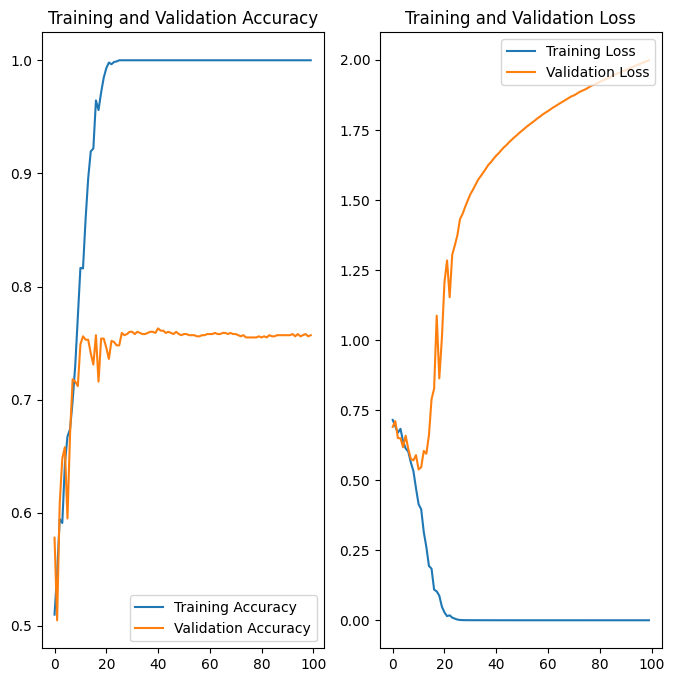

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')

plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()